# Bell inequalities in real space for the de Sitter vacuum
This notebook produces the plots of arXiv:2203.03505 related to de Bunch-Davies vacuum of Sitter spacetime, in particular figs. 3, 5, 7, 8, 9 and 10.

As reminder, arXiv:2203.03505 is a study of Bell inequalities in real space for both Minkowski and de Sitter space-times. In a nutshell, the goals of the paper are:

i) Study whether quantum fields in Gaussian states tend to violate Bell inequalities in real space.

ii) Apply this to cosmological perturbations, which have a quantum origin in the inflationary paradigm.

iii) Compare results with that of quantum discord, which is known to be non-vanishing in this same set-up.

Some of its conclusions are:

i) Due to "effective decoherence", quantum fields tend not to violate Bell inequalities in real space.

ii) Therefore, this tool as it is is not helpful to probe the quantum origin of primordial perturbations.

iii) There seems to be a contradiction with quantum discord, casting doubt on its valitidy for highly mixed states.

This notebook deals with the results in de Sitter spacetime

In [1]:
# Import all the needed packages

import numpy as np
from scipy import special
from scipy import integrate
import sympy
import math
import cmath
import matplotlib.pyplot as plt
from matplotlib import rc

rc('text',usetex=True)

In [2]:
# Import auxiliary files

from deSitter_aux import * # Characterization of the de Sitter vacuum
from bell_aux import * # Expected values of the Bell operators (GKMR and Larsson)
from discord import * # Quantum discord and related functions

We show the plots of the Bell operator built from GKMR pseudo-spin operators. We explore first the most relevant region in parameter space and allow for variations of alpha and HR.

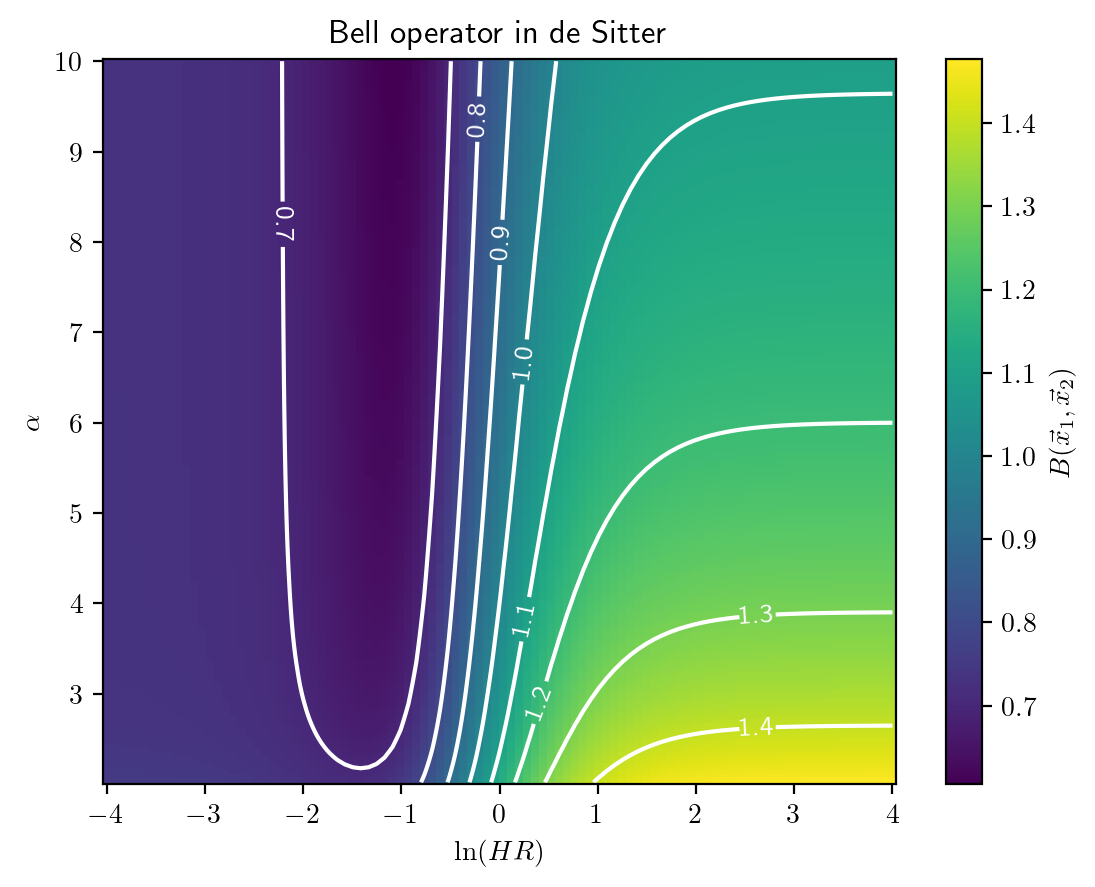

In [14]:
# Compute the GKMR Bell operator as a function of alpha and HR
# delta and beta are fixed

delta = 0.01 # fixed delta
beta=10e-5 # fixed beta

alphas = np.linspace(2*(1+delta)+delta/100,10,200) # array of alpha
logHRs=np.linspace(-4,4,100) # array of log(HR)

bell_gkmr = []

# iterate over alpha
for alpha in alphas:
    temp = []
    
    # iterate over log(HR)
    for logHR in logHRs:
        HR = np.exp(logHR)
        cov = compute_gammas_exact(alpha,beta,HR,delta)
        temp.append(2*np.sqrt(Sxx_GKMR(cov)**2 + Szz_GKMR(cov)**2)) 
    bell_gkmr.append(temp)
    
bell_gkmr = np.array(bell_gkmr)

# plot results
fig, ax = plt.subplots(figsize = (6.4,4.8),dpi=200)
CS = ax.pcolor(logHRs,alphas,bell_gkmr,rasterized=True,shading='auto')
CS2 = ax.contour(logHRs,alphas,bell_gkmr,levels=np.linspace(0.1,2,20),colors='white')
ax.set_title('Bell operator in de Sitter')
ax.clabel(CS2, inline=True, fontsize=10, fmt='%1.1f')
plt.ylabel(r'$\alpha$')
plt.xlabel(r'$\ln (HR)$')
cbar = fig.colorbar(CS, ax=ax)
cbar.set_label(r'$B(\vec{x}_1,\vec{x}_2)$')
plt.savefig('pic.pdf')
plt.show()

As it can be seen, there is no Bell inequality violation, for B < 2.

We show the plots of the Bell operator built from Larsson pseudo-spin operators. These are actually a one-parameter family of operators, labelled by l, which makes its study computationally more expensive. Approximations in the small- and large-l regimes are also provided. We explore this for several values of HR.

In [5]:
# Compute the Larsson Bell operator as a function of l
# alpha, beta and delta are fixed
# HR takes several values in order to include both super- and sub-Hubble modes
# Note that for l<1 computing times increase fast, as l**(-2)
# In practice, l < 0.3 is discouraged

ells_sub = np.linspace(1,5,100) # sub-Hubble regime
ells_super = np.linspace(1,20,100) # super-Hubble regime requires higher l to probe some features

logHRs_sub = [-2, -1, 0] # array of log(HR) sub-Hubble
logHRs_super = [0, 1, 2] # array of log(HR) super-Hubble
alpha = 3 # fixed alpha
beta = 0.0001 # fixed beta
delta = 0.1 # fixed delta

# initiate the arrays with results
bell_sub = []
bell_super = []

# iterate HR for sub-Hubble regime
for logHR in logHRs_sub:
    HR = np.exp(logHR)
    cov = compute_gammas_exact(alpha,beta,HR,delta)
    temp = []
    for ell in ells_sub:
        sxx = Sxx_L(ell,int(max(round(10/ell**2),10)),cov)
        szz = Szz_L(ell,int(max(round(10/ell**2),10)),cov)
        temp.append(2*np.sqrt(sxx**2 + szz**2))
    bell_sub.append(temp)
    
# iterate HR for sub-Hubble regime
for logHR in logHRs_super:
    HR = np.exp(logHR)
    cov = compute_gammas_exact(alpha,beta,HR,delta)
    temp = []
    for ell in ells_super:
        sxx = Sxx_L(ell,int(max(round(10/ell**2),10)),cov)
        szz = Szz_L(ell,int(max(round(10/ell**2),10)),cov)
        temp.append(2*np.sqrt(sxx**2 + szz**2))
    bell_super.append(temp)

bell_sub = np.array(bell_sub)
bell_super = np.array(bell_super)

In [12]:
# Compute small-l approximation for Larsson Bell
# alpha, belta and delta are fixed
# This allows to go below l = 0.3

alpha = 3 # fixed alpha
beta = 0.0001 # fixed beta
delta = 0.1 # fixed delta

bell_L_app = np.array([])
logHR_app = [-2,-1,0,1,2]
ells_app = ells_sub
bell_app = []

# Iterate over the parameters HR and l
for logHR in logHR_app:
    HR = np.exp(logHR)
    cov = compute_gammas_exact(alpha,beta,HR,delta)
    temp = []
    for ell in ells_app:
    # compute approximated correlation functions
        sxx = Sxx_L_app(ell,cov)
        szz = Szz_L_app(ell,cov)
        temp.append(2*np.sqrt(sxx**2 + szz**2))
    bell_app.append(temp)

bell_app = np.array(bell_app)

# We will only use the approximation for HR = 1, but is valid for any HR

In [23]:
# Compute large-l approximation for Larsson Bell
# all parameters are fixed

alpha = 3 # fixed alpha
beta = 0.0001 # fixed beta
delta = 0.1 # fixed delta
HR = 1 #fixed HR

cov = compute_gammas_exact(alpha,beta,HR,delta)

bell_large_l = Sxx_GKMR(cov)

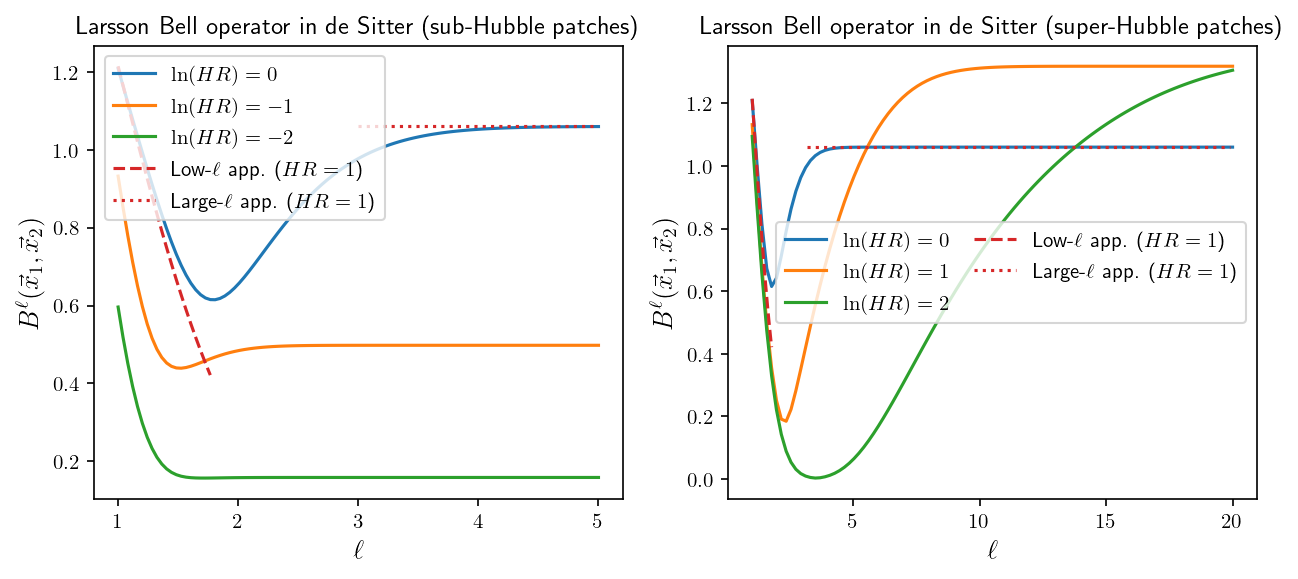

In [24]:
# Plots

# Subplot with sub-Hubble regime

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharex=False,figsize = (10,4),dpi=150)
ax0.plot(ells_sub[:300],bell_sub[2,:300],label=r"$\ln(HR)=0$")
ax0.plot(ells_sub[:300],bell_sub[1,:300],label=r"$\ln(HR)=-1$")
ax0.plot(ells_sub[:300],bell_sub[0,:300],label=r"$\ln(HR)=-2$")
ax0.plot(ells_sub[:20],bell_app[2,:20],label=r"Low-$\ell$ app. ($HR=1$)",linestyle='dashed')
ax0.set_xlabel(r'$\ell$',fontsize=13)
ax0.set_ylabel(r'$B^\ell(\vec{x}_1,\vec{x}_2)$',fontsize=13)
ax0.set_title(r'Larsson Bell operator in de Sitter (sub-Hubble patches)',fontsize=12)
ax0.axhline(y=2*bell_large_l,color="tab:red",linestyle="dotted",xmin=0.5,xmax=0.95,label=r"Large-$\ell$ app. ($HR=1$)")
ax0.legend()

# Subplot with super-Hubble regime

ax1.plot(ells_super,bell_super[0,:],label=r"$\ln(HR)=0$")
ax1.plot(ells_super,bell_super[1,:],label=r"$\ln(HR)=1$")
ax1.plot(ells_super,bell_super[2,:],label=r"$\ln(HR)=2$")
ax1.plot(ells_sub[:20],bell_app[2,:20],label=r"Low-$\ell$ app. ($HR=1$)",linestyle='dashed')
ax1.set_xlabel(r'$\ell$',fontsize=13)
ax1.set_ylabel(r'$B^\ell(\vec{x}_1,\vec{x}_2)$',fontsize=13)
ax1.set_title(r'Larsson Bell operator in de Sitter (super-Hubble patches)',fontsize=12)
ax1.axhline(y=2*bell_large_l,color="tab:red",linestyle="dotted",xmin=0.15,xmax=0.95,label=r"Large-$\ell$ app. ($HR=1$)")
ax1.legend(ncol=2,columnspacing=1.2)
plt.savefig('pic.pdf',bbox_inches="tight")
plt.show()

Again, no violations of Bell inequalities are found, since B < 2.

We turn now to the study of correlations as a function of HR. In particular, we consider quantum discord, mutual information, purity and the GKMR Bell expected value.

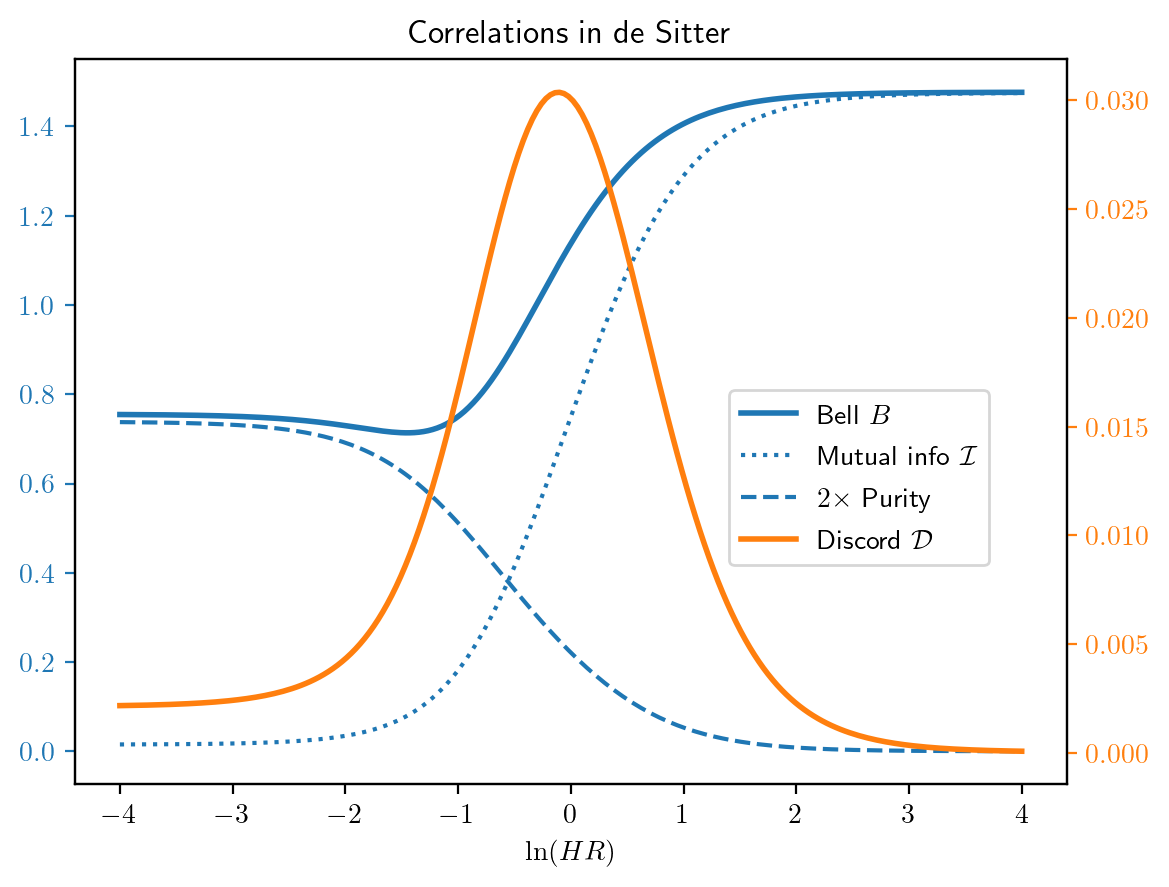

In [6]:
# Plot measures of correlations as a function of HR

logHRs = np.linspace(-4,4,200) # array of HR

delta = 0.01 # fixed delta
alpha = 2*(1+delta)+delta/100 # fixed alpha to minimum value
beta = 0.0001 # fixed beta

# initiate arrays
dis = np.array([])
iinfo = np.array([])
jinfo = np.array([])
bell_gkmr = np.array([])
purities = np.array([])
correlations = np.array([])

# iterate over HR and compute measures of correlations
for logHR in logHRs:
    HR = np.exp(logHR)
    cov = compute_gammas_exact(alpha,beta,HR,delta)
    dis = np.append(dis,discord(cov))
    iinfo = np.append(iinfo,Iinfo(cov))
    jinfo = np.append(jinfo,Jinfo(cov))
    purities = np.append(purities,purity(cov))
    sxx = Sxx_GKMR(cov)
    szz = Szz_GKMR(cov)
    correlations = np.append(correlations, sxx)
    bell_gkmr = np.append(bell_gkmr, 2*np.sqrt(sxx**2 + szz**2))


# Note the factor 2 to cancel the one introduced in the compute_gammas_exact function
# Since the formulas for discord, iinfo and jinfo from VV and JM papers use the other convention

fig,ax = plt.subplots(figsize = (6.4,4.8),dpi=200)
ax.plot(logHRs,bell_gkmr,label=r"Bell $B$",color='tab:blue', linewidth=2)
ax.plot(logHRs,iinfo,label=r"Mutual info $\mathcal{I}$",color='tab:blue',linestyle='dotted')
ax.plot(logHRs,2*purities,label=r"$2\times$ Purity",color='tab:blue',linestyle='dashed')
#ax.plot(logHRs,2*correlations,label=r"$2\times$ corre",color='tab:green',linestyle='dashed')
ax.set_xlabel(r'$\ln(HR)$')
ax.set_title("Correlations in de Sitter")
ax.tick_params(axis='y', colors='tab:blue')
ax1 = ax.twinx()
ax1.plot(logHRs,dis,color='tab:orange',label=r'Discord $\mathcal{D}$', linewidth=2)
ax1.tick_params(axis='y', colors='tab:orange')
fig.legend(bbox_to_anchor = (0.85, 0.55))
plt.savefig('pic.pdf')
plt.show()

As it can be seen, the contribution to the Bell expected value for HR<<1 comes from the purity, while for HR>>1 the state gets highly mixed and the contribution from mutual information dominates. Quantum discord, on the other hand, is suppressed in both limits and only is relevant for HR ~ 1, where a delicate balance takes place. This balance, however, does not boost Bell.

We can extend the the study of the Bell GKMR expected value to other regions of parameter space
In particular, we explore varying other pairs parameters. We will conclude similarly that Bell inequalities are not violated, as B<2.

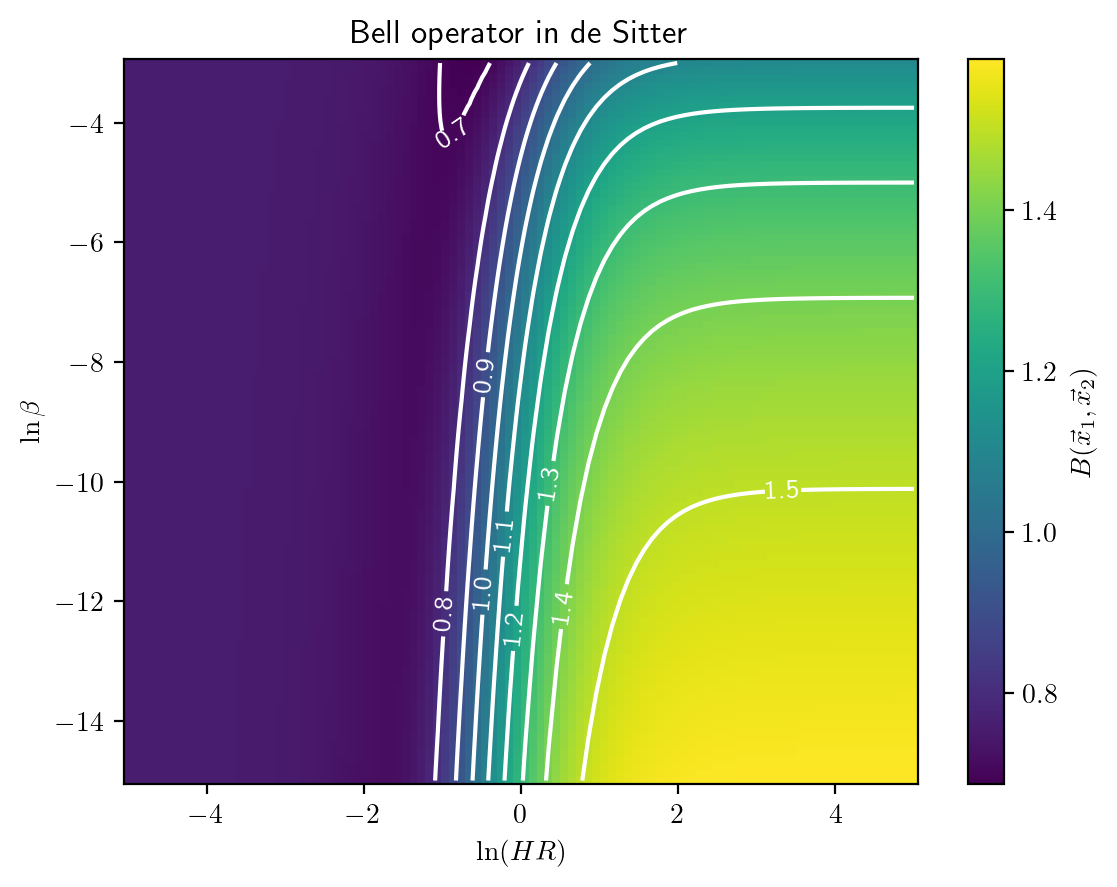

In [13]:
# Compute the GKMR Bell operator as a function of beta and HR
# delta and alpha are now fixed

delta = 0.01 # fixed delta
alpha = 2*(1+delta)+delta/100 # fixed alpha
logHRs=np.linspace(-5,5,100) # array of HR
logbetas = np.linspace(-15,-3,100) # array of beta

bell_gkmr = []

# iterate over betas
for logbeta in logbetas:
    beta = np.exp(logbeta)
    temp = []
    
    # iterate over log(HR)
    for logHR in logHRs:
        HR = np.exp(logHR)
        cov = compute_gammas_exact(alpha,beta,HR,delta)
        temp.append(2*np.sqrt(Sxx_GKMR(cov)**2 + Szz_GKMR(cov)**2)) 
    bell_gkmr.append(temp)
    
bell_gkmr = np.array(bell_gkmr)

# plot results
fig, ax = plt.subplots(figsize = (6.4,4.8),dpi=200)
CS = ax.pcolor(logHRs,logbetas,bell_gkmr,rasterized=True,shading='auto')
CS2 = ax.contour(logHRs,logbetas,bell_gkmr,levels=np.linspace(0.1,2,20),colors='white')
ax.set_title('Bell operator in de Sitter')
ax.clabel(CS2, inline=True, fontsize=10, fmt='%1.1f')
plt.ylabel(r'$\ln \beta$')
plt.xlabel(r'$\ln (HR)$')
cbar = fig.colorbar(CS, ax=ax)
cbar.set_label(r'$B(\vec{x}_1,\vec{x}_2)$')
plt.savefig('pic.pdf')
plt.show()

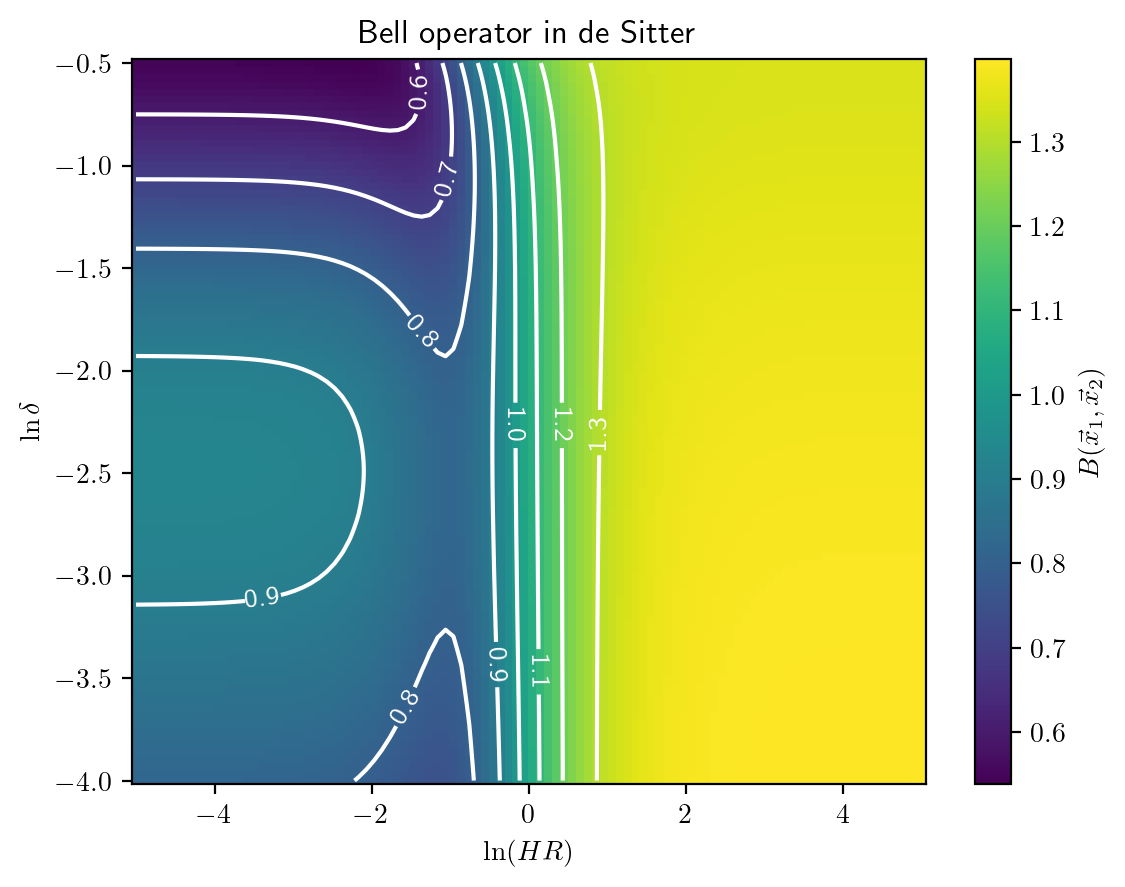

In [12]:
# Compute the GKMR Bell operator as a function of HR and delta
# delta and alpha are now fixed

beta = 1e-3 # fixed beta
logHRs=np.linspace(-5,5,100) # array of HR
logdeltas = np.linspace(-4,-0.5,100) # array of deltas, which are also used to obtain alpha

bell_gkmr = []

# iterate over delta
for logdelta  in logdeltas:
    delta = np.exp(logdelta)
    alpha = 2*(1+delta)+delta/100
    temp = []
    
    # iterate over log(HR)
    for logHR in logHRs:
        HR = np.exp(logHR)
        cov = compute_gammas_exact(alpha,beta,HR,delta)
        temp.append(2*np.sqrt(Sxx_GKMR(cov)**2 + Szz_GKMR(cov)**2)) 
    bell_gkmr.append(temp)
    
bell_gkmr = np.array(bell_gkmr)

# plot results
fig, ax = plt.subplots(figsize = (6.4,4.8),dpi=200)
CS = ax.pcolor(logHRs,logdeltas,bell_gkmr,rasterized=True,shading='auto')
CS2 = ax.contour(logHRs,logdeltas,bell_gkmr,levels=np.linspace(0.1,2,20),colors='white')
ax.set_title('Bell operator in de Sitter')
ax.clabel(CS2, inline=True, fontsize=10, fmt='%1.1f')
plt.ylabel(r'$\ln \delta$')
plt.xlabel(r'$\ln (HR)$')
cbar = fig.colorbar(CS, ax=ax)
cbar.set_label(r'$B(\vec{x}_1,\vec{x}_2)$')
plt.savefig('pic.pdf')
plt.show()